In [1]:
from scSecretome.sc import *

scanpy==1.4.2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 


# A comprehensive single cell transcriptional landscape of human hematopoietic progenitors, Nature 2019

- There are two sets of single cell data from two human.
- Each types of cell is sorted by FACs and operated in parallel --> batch effect?

In [2]:
# all the data
from os import listdir
file_list = listdir('/home/hsher/nature2019_sc/raw_counts/')
# the paper contain data from two patients
sample_two = [s for s in file_list if 'Lin' in s]
sample_one = [s for s in file_list if 'Lin' not in s]

In [3]:
sample_one # only CD45+ cells

['GSM3305364_CMP.raw_counts.tsv',
 'GSM3305363_MEP.raw_counts.tsv',
 'GSM3305365_GMP.raw_counts.tsv',
 'GSM3305362_PreBNK.raw_counts.tsv',
 'GSM3305360_MPP.raw_counts.tsv',
 'GSM3305359_HSC.raw_counts.tsv',
 'GSM3305361_MLP.raw_counts.tsv']

In [4]:
sample_two # cells more than CD45

['GSM3305369_LinNegCD34NegCD164low.raw_counts.tsv',
 'GSM3305367_LinNegCD34NegCD164high.raw_counts.tsv',
 'GSM3305366_LinNegCD34PosCD164Pos.raw_counts.tsv',
 'GSM3305368_LinNegCD34lowCD164high.raw_counts.tsv']

## In this paper, they have different transcript per cell threshold for each kind of cell.
As you can see in the benchmarking matrix, the quality of data is quite different.
Also, in some paper they mention different cell types should have different threshold. For example neutrophils inheritantly has less RNAs compared to other kinds of cell.

## Benchmarking matrix

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305364_CMP.raw_counts.h5ad
Library
GSM3305364_CMP.raw_counts.tsv


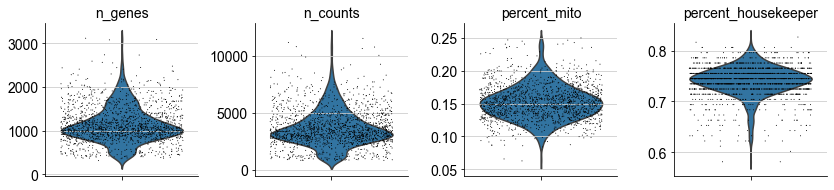

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305363_MEP.raw_counts.h5ad
Library
GSM3305363_MEP.raw_counts.tsv


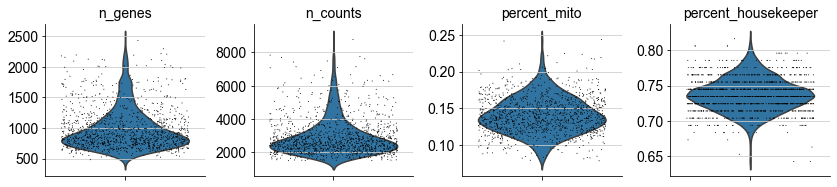

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305365_GMP.raw_counts.h5ad
Library
GSM3305365_GMP.raw_counts.tsv


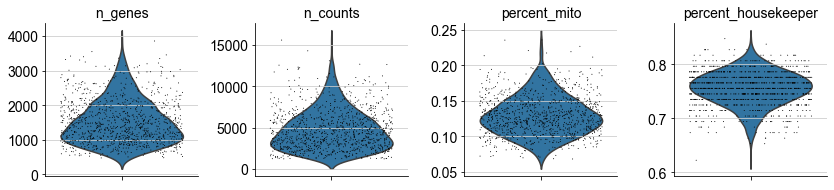

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305362_PreBNK.raw_counts.h5ad
Library
GSM3305362_PreBNK.raw_counts.tsv


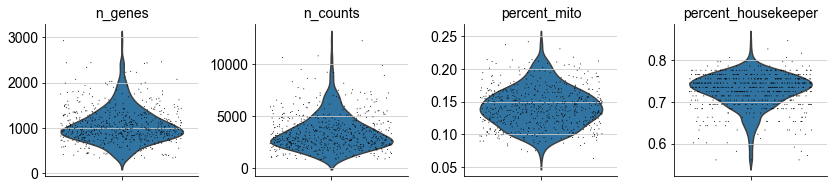

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305360_MPP.raw_counts.h5ad
Library
GSM3305360_MPP.raw_counts.tsv


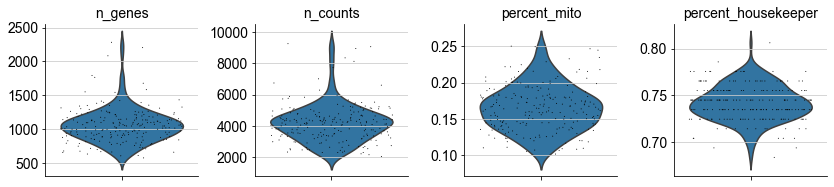

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305359_HSC.raw_counts.h5ad
Library
GSM3305359_HSC.raw_counts.tsv


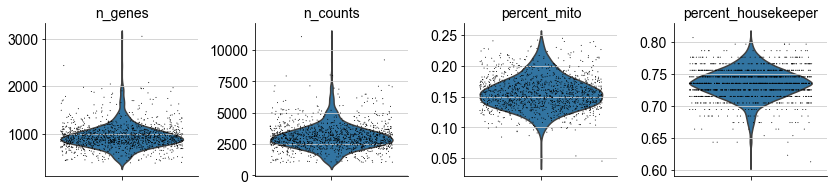

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305361_MLP.raw_counts.h5ad
Library
GSM3305361_MLP.raw_counts.tsv


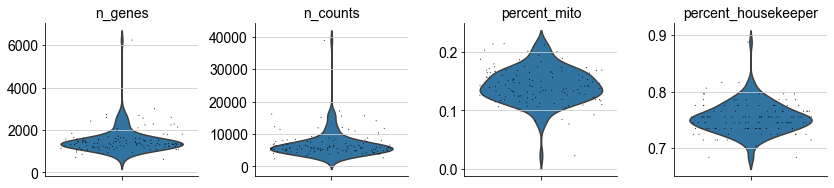

In [5]:
for s in sample_one:
    # run benchmarking
    d = read_raw_counts('/home/hsher/nature2019_sc/raw_counts/'+s)
    benchmarking(d)
    
    # see benchmarking result
    print(s)
    sc.pl.violin(d, ['n_genes', 'n_counts', 'percent_mito', 'percent_housekeeper'], jitter=0.4, multi_panel=True)

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305369_LinNegCD34NegCD164low.raw_counts.h5ad
Library
GSM3305369_LinNegCD34NegCD164low.raw_counts.tsv


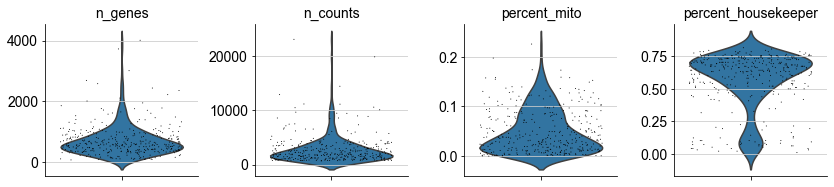

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305367_LinNegCD34NegCD164high.raw_counts.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Library
GSM3305367_LinNegCD34NegCD164high.raw_counts.tsv


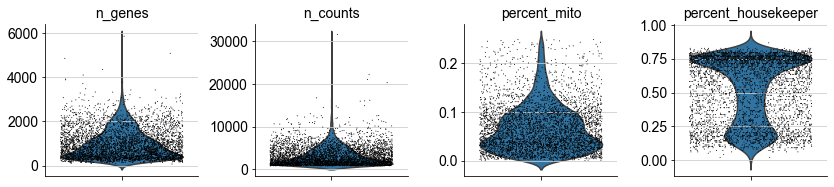

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305366_LinNegCD34PosCD164Pos.raw_counts.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Library


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


GSM3305366_LinNegCD34PosCD164Pos.raw_counts.tsv


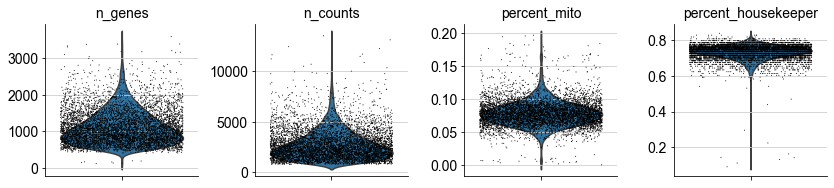

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305368_LinNegCD34lowCD164high.raw_counts.h5ad
Library


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


GSM3305368_LinNegCD34lowCD164high.raw_counts.tsv


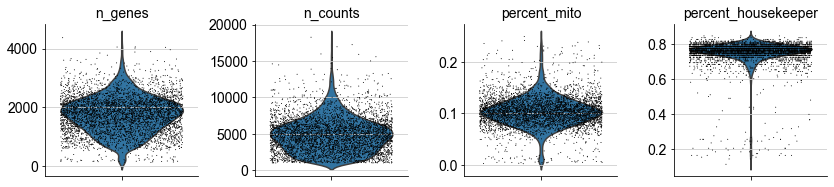

In [6]:
for s in sample_two:
    # run benchmarking
    d = read_raw_counts('/home/hsher/nature2019_sc/raw_counts/'+s, ignore_lines = 1, transpose = True)
    benchmarking(d, species = 'human')
    
    # see benchmarking result
    print(s)
    sc.pl.violin(d, ['n_genes', 'n_counts', 'percent_mito', 'percent_housekeeper'], jitter=0.4, multi_panel=True)

In [7]:
d.var.index[d.var.index.str.contains('MT.')].values # different naming for mitochrondrial genes?!

array(['ADAMTS1', 'ADAMTS10', 'ADAMTS12', 'ADAMTS13', 'ADAMTS14',
       'ADAMTS15', 'ADAMTS16', 'ADAMTS17', 'ADAMTS18', 'ADAMTS19',
       'ADAMTS2', 'ADAMTS20', 'ADAMTS3', 'ADAMTS4', 'ADAMTS5', 'ADAMTS6',
       'ADAMTS7', 'ADAMTS8', 'ADAMTS9', 'ADAMTS9.AS1', 'ADAMTS9.AS2',
       'ADAMTSL1', 'ADAMTSL2', 'ADAMTSL3', 'ADAMTSL4', 'ADAMTSL5', 'AMTN',
       'ARMT1', 'ASMTL', 'ASMTL.AS1', 'BHMT2', 'BMT2', 'CAMTA1', 'CAMTA2',
       'CARNMT1', 'CKMT1A', 'CKMT1B', 'CKMT2', 'CKMT2.AS1', 'CMTM1',
       'CMTM2', 'CMTM3', 'CMTM4', 'CMTM5', 'CMTM6', 'CMTM7', 'CMTM8',
       'CMTR1', 'CMTR2', 'COMTD1', 'DIMT1', 'DMTF1', 'DMTN', 'DNMT1',
       'DNMT3A', 'DNMT3B', 'DNMT3L', 'EEF1AKMT1', 'EHMT1', 'EHMT2',
       'FERMT1', 'FERMT2', 'FERMT3', 'HENMT1', 'KMT2A', 'KMT2B', 'KMT2C',
       'KMT2E', 'KMT5A', 'KMT5B', 'KMT5C', 'LAMTOR1', 'LAMTOR2',
       'LAMTOR3', 'LAMTOR4', 'LAMTOR5', 'LAMTOR5.AS1', 'LCMT1',
       'LCMT1.AS1', 'LCMT1.AS2', 'LCMT2', 'LMTK2', 'LMTK3', 'MIMT1',
       'MT.ATP6', 'MT.AT

In [8]:
d[d.obs['percent_mito']<0.25]

View of AnnData object with n_obs × n_vars = 4266 × 24719 
    obs: 'Library', 'n_counts', 'n_genes', 'percent_mito', 'percent_housekeeper'

In [9]:
d

AnnData object with n_obs × n_vars = 4266 × 24719 
    obs: 'Library', 'n_counts', 'n_genes', 'percent_mito', 'percent_housekeeper'

## we will just use their threshold to throw away cells


In [10]:
sample_one + sample_two
threshold = [800, 1000, 1000, 800, 2000, 1000, 2000, 800, 800, 800, 800]
# threshold value are from "Methods: cell filtering and data normalization"
# for LinNeg celles they use different threshold for different reps but here the filename cannot tell which rep it is. 
# To retain as much signal as possible I picked the lower threshold

In [11]:
import pandas as pd
thres_df = pd.DataFrame(index = sample_one + sample_two, columns = ['transcript per cell'], data = threshold)

In [12]:
thres_df['annotation'] = ['CMP', 'MEP', 'GMP', 'PreBNK', 'MPP', 'HSC', 'MLP', 'Lin- CD34- CD164low', 'Lin- CD34- CD164high', 'Lin- CD34+ CD164+', 'Lin- CD34low CD164high']

In [13]:
thres_df

transcript per cell  \
GSM3305364_CMP.raw_counts.tsv                                     800   
GSM3305363_MEP.raw_counts.tsv                                    1000   
GSM3305365_GMP.raw_counts.tsv                                    1000   
GSM3305362_PreBNK.raw_counts.tsv                                  800   
GSM3305360_MPP.raw_counts.tsv                                    2000   
GSM3305359_HSC.raw_counts.tsv                                    1000   
GSM3305361_MLP.raw_counts.tsv                                    2000   
GSM3305369_LinNegCD34NegCD164low.raw_counts.tsv                   800   
GSM3305367_LinNegCD34NegCD164high.raw_counts.tsv                  800   
GSM3305366_LinNegCD34PosCD164Pos.raw_counts.tsv                   800   
GSM3305368_LinNegCD34lowCD164high.raw_counts.tsv                  800   

                                                              annotation  
GSM3305364_CMP.raw_counts.tsv                                        CMP  
GSM3305363_MEP.raw_counts.tsv                                        MEP  
GSM3305365_GMP.raw_counts.tsv                                        GMP  
GSM3305362_PreBNK.raw_counts.tsv                                  PreBNK  
GSM3305360_MPP.raw_counts.tsv                                        MPP  
GSM3305359_HSC.raw_counts.tsv                                        HSC  
GSM3305361_MLP.raw_counts.tsv                                        MLP  
GSM3305369_LinNegCD34NegCD164low.raw_counts.tsv      Lin- CD34- CD164low  
GSM3305367_LinNegCD34NegCD164high.raw_counts.tsv    Lin- CD34- CD164high  
GSM3305366_LinNegCD34PosCD164Pos.raw_counts.tsv        Lin- CD34+ CD164+  
GSM3305368_LinNegCD34lowCD164high.raw_counts.tsv  Lin- CD34low CD164high

In [14]:
def filter_pellin(sample):
    '''
    input list of samples for experiment
    output combined data matrix
    '''
    d = read_raw_counts('/home/hsher/nature2019_sc/raw_counts/'+sample)
    
    # put FACs data inside
    d.obs['cluster'] = thres_df.loc[sample, 'annotation']
        
    # filter by transcript per cell
    sc.pp.filter_cells(d, min_counts = thres_df.loc[sample, 'transcript per cell'])
        
    # called benchmarking to calculate 
    benchmarking(d)
        
    # fileter by mitochondrial trancript: dying cell
    d = d[d.obs['percent_mito']<0.25]
        
    # normalize, by excludeing frequent gene to avoid distorting data
    sc.pp.normalize_total(d)
    
    # log1p should come before combating batch effect
    sc.pp.log1p(d)
        
    # append all batch to list
    return(d)
        
        

In [15]:
def concat_data(sample_list):
    processed = list(map(filter_pellin, sample_list))
    concat = processed[0].concatenate(processed[1:len(processed)])
    
    #sc.pp.combat(concat)
    
    return(concat)

In [16]:
concat_one = concat_data(sample_one)

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305364_CMP.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305363_MEP.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305365_GMP.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305362_PreBNK.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305360_MPP.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305359_HSC.raw_counts.h5ad
Library
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305361_MLP.raw_counts.h5ad
Library


In [17]:
def previsualize(concat):
    
    # calling various marker gene from literature
    lineage_calling(concat, species = 'human')
    
    # set the raw data to log form
    concat.raw = concat

    # set highly variable genes
    sc.pp.highly_variable_genes(concat, min_mean=0.0125, max_mean=3, min_disp=0.5)

    # see if batch effect correction changes the result
    # principle component analysis
    sc.tl.pca(concat, svd_solver='arpack')

    # compute neibors for PC
    sc.pp.neighbors(concat, n_neighbors=4, n_pcs=40) # using paper's k=4
    
    # compute umap
    sc.tl.umap(concat) 
    
    # compute louvain cluster
    sc.tl.louvain(concat)
    
    #performing Diffusion Pseudotime analysis: don't know how to set param
    sc.tl.dpt(concat, n_branchings=1)

    return(concat)
    

In [18]:
previsualize(concat_one)

/home/hsher/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:01.42)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:02.89) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
    using 'X_pca' with n_pcs = 40
    finished (0:00:08.76) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.29) --> found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
    adata.uns['iroot'] = root_cell_index
    adata.var['xroot'] = adata[root_cell_name, :].X
computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition mat

AnnData object with n_obs × n_vars = 6011 × 25464 
    obs: 'Library', 'batch', 'cluster', 'n_counts', 'n_genes', 'percent_housekeeper', 'percent_mito', 'B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage', 'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage', 'Megakaryocyte Lineage', 'Multi Potential Progenitor', 'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage', 'C', 'O1', 'O2', 'O3', 'P1', 'P2', 'P3', 'P4', 'V1', 'V2', 'louvain', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'diffmap_evals', 'dpt_changepoints', 'dpt_grouptips'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'

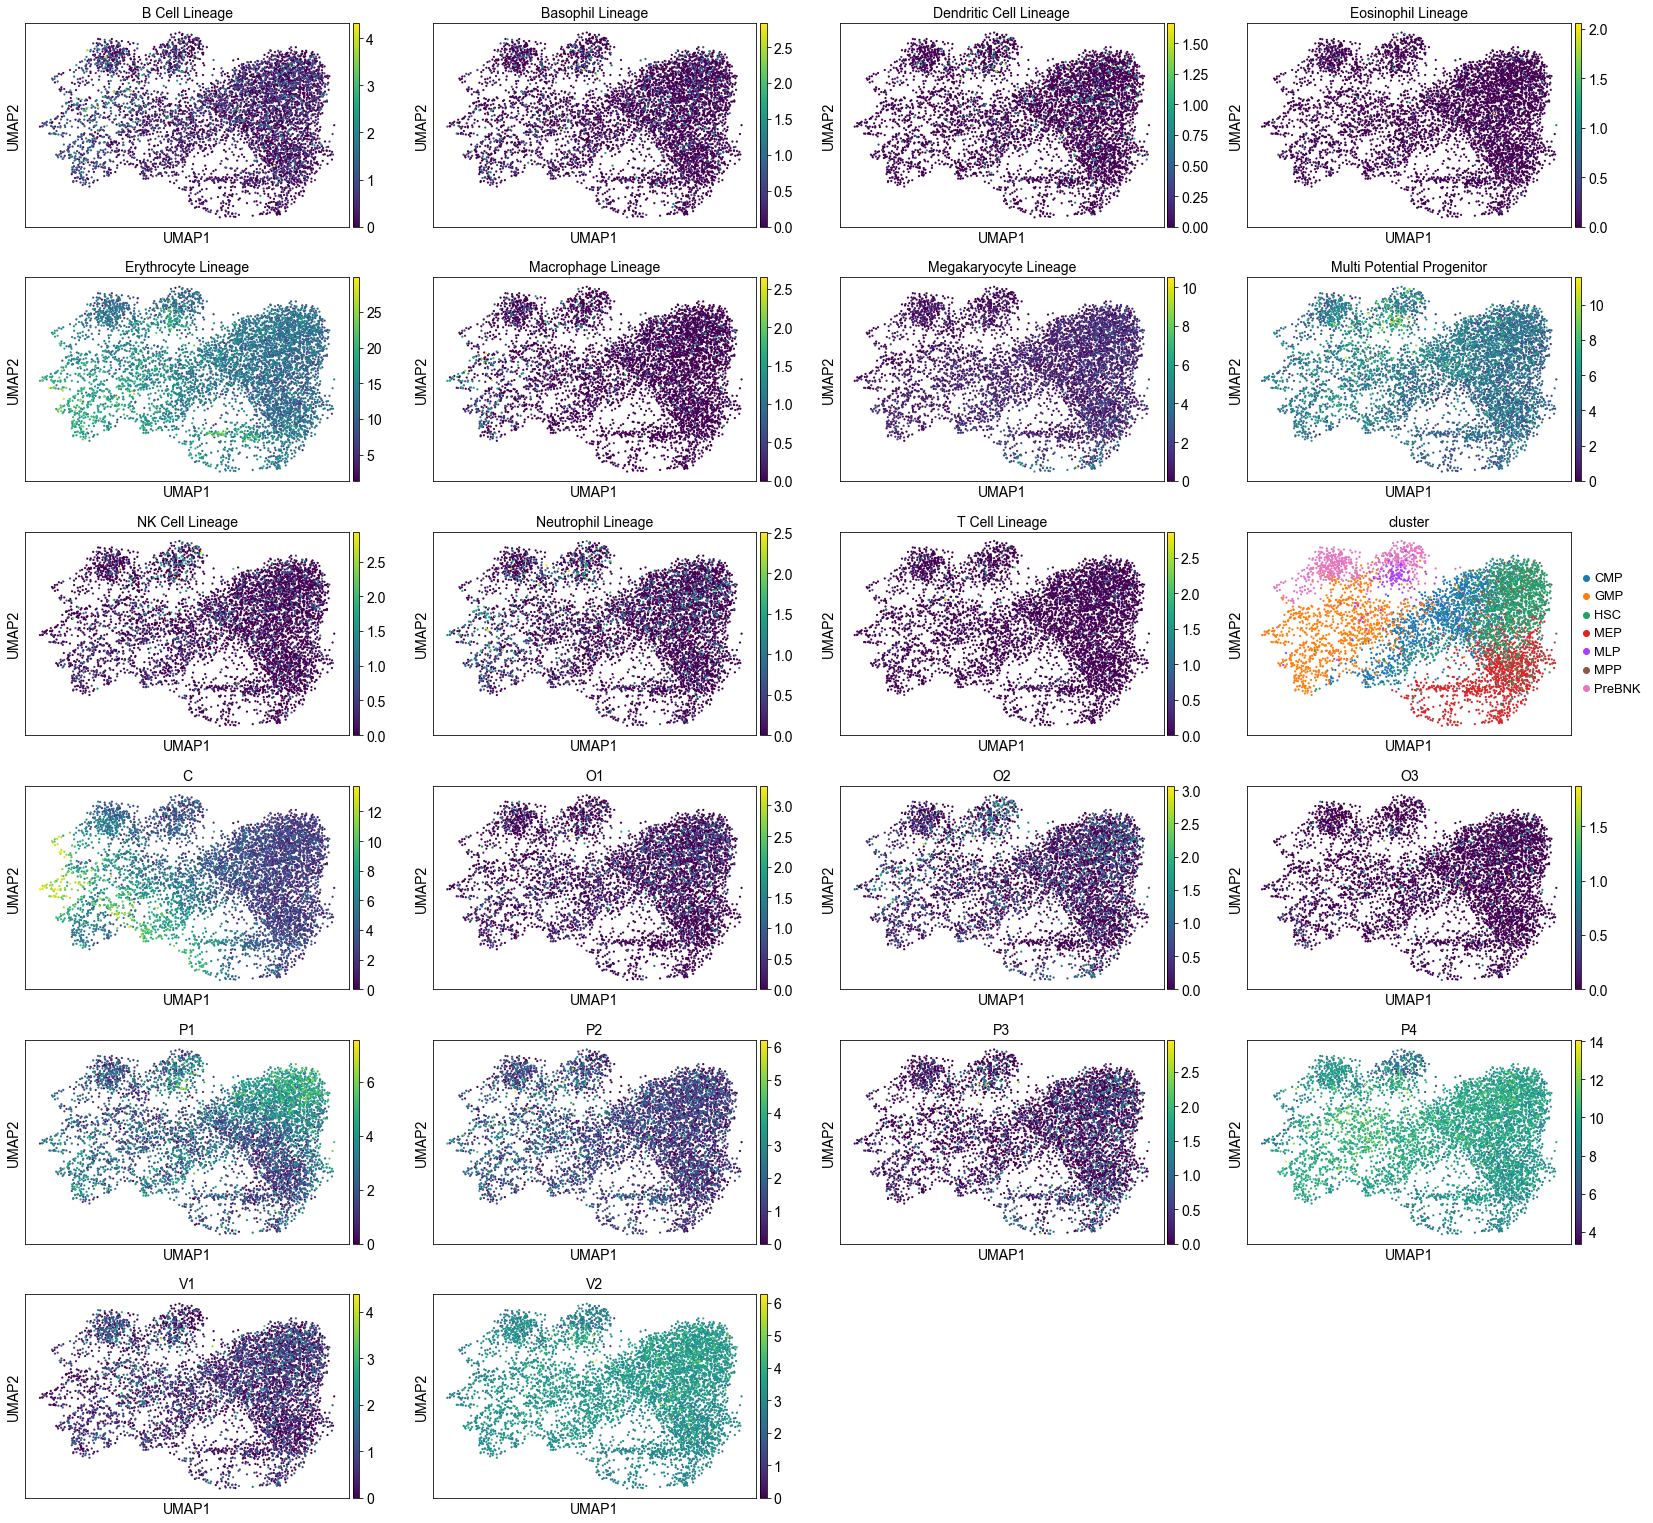

In [21]:
sc.pl.umap(concat_one, color=['B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage',
       'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage',
       'Megakaryocyte Lineage', 'Multi Potential Progenitor',
       'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage','cluster', 'C', 'O1', 'O2', 'O3', 'P1', 'P2', 'P3', 'P4',
       'V1', 'V2'], use_raw=False)

drawing single-cell graph using layout "fa"
    finished (0:00:33.80) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


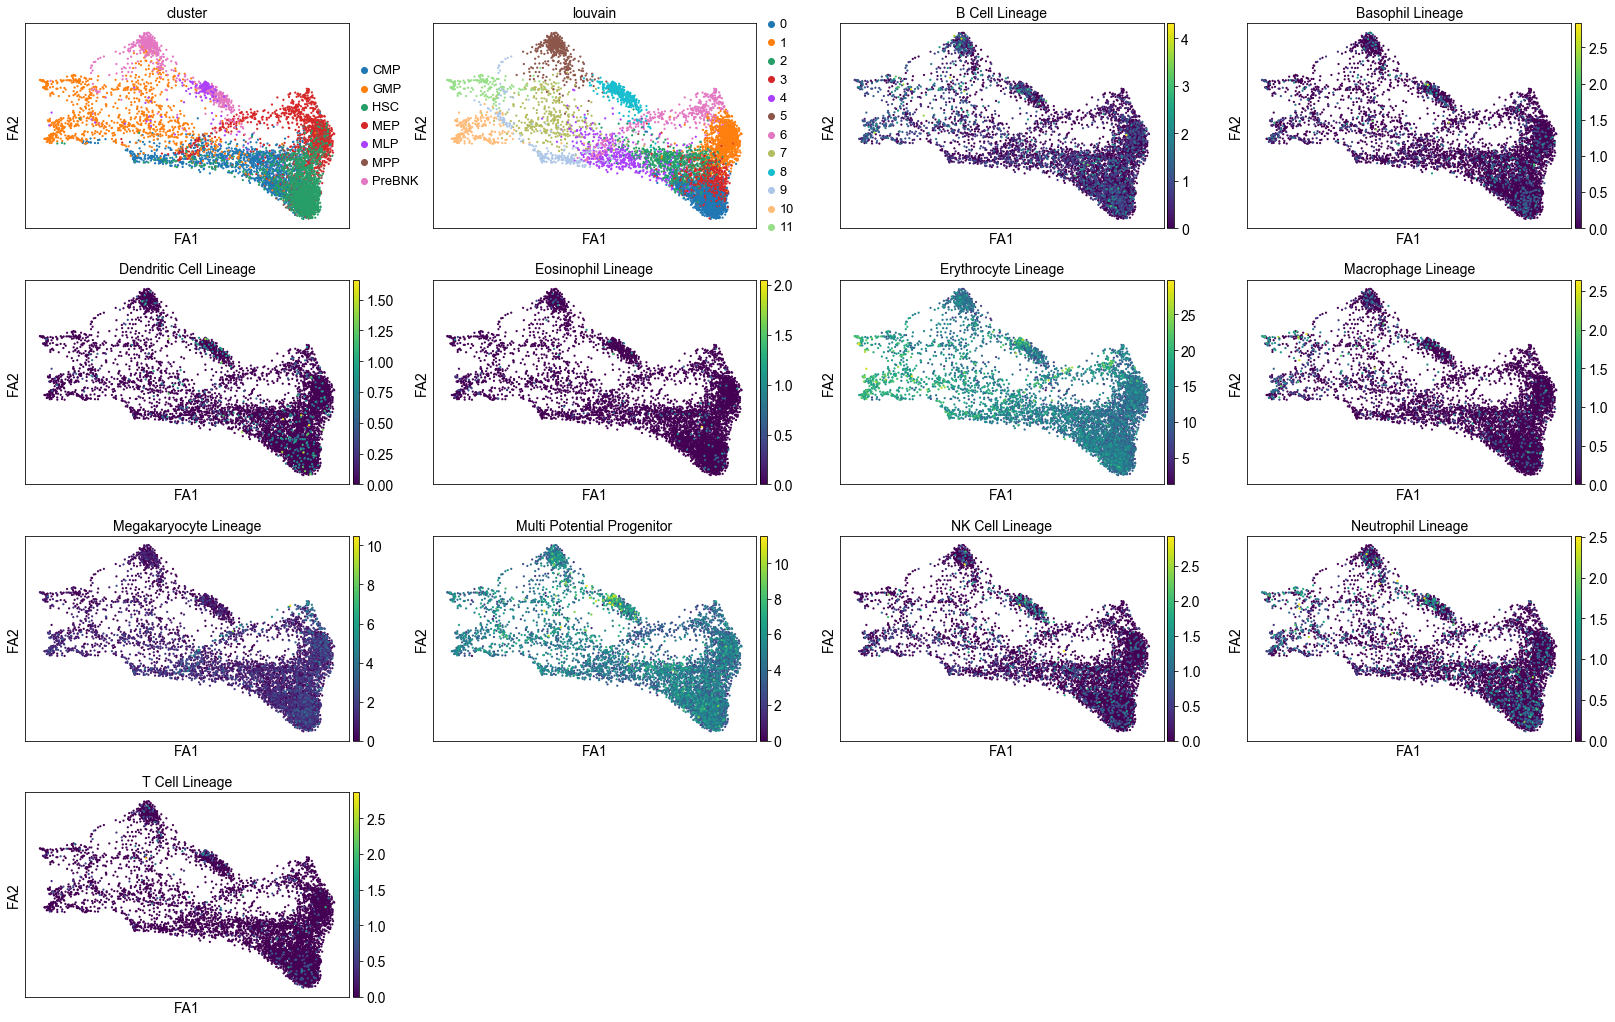

In [22]:
sc.tl.draw_graph(concat_one)
sc.pl.draw_graph(concat_one, color=['cluster', 'louvain', 'B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage',
       'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage',
       'Megakaryocyte Lineage', 'Multi Potential Progenitor',
       'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage'])


running PAGA
    finished (0:00:00.23) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])


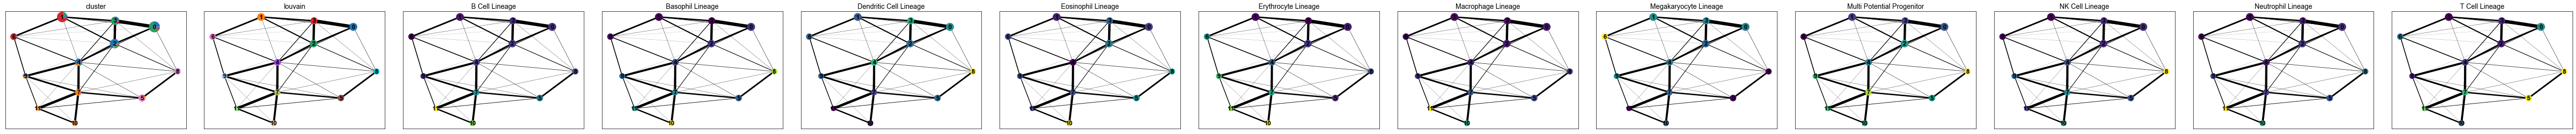

In [23]:
sc.tl.paga(concat_one)
sc.pl.paga(concat_one, color=['cluster', 'louvain', 'B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage',
       'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage',
       'Megakaryocyte Lineage', 'Multi Potential Progenitor',
       'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage'])

In [24]:
concat_two = concat_data(sample_two)
previsualize(concat_two)

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305369_LinNegCD34NegCD164low.raw_counts.h5ad
Library
filtered out 15 cells that have less than 800 counts
... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305367_LinNegCD34NegCD164high.raw_counts.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Library


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305366_LinNegCD34PosCD164Pos.raw_counts.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Library


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305368_LinNegCD34lowCD164high.raw_counts.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Library


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.
/home/hsher/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:02.88)
computing neighbors
    using 'X_pca' with n_pcs = 40


/home/hsher/miniconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/hsher/miniconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/lib/python3.7/site-packages/umap/utils.py", line 409:
@num

    finished (0:00:05.33) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
    using 'X_pca' with n_pcs = 40


/home/hsher/miniconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


    finished (0:00:08.14) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.50) --> found 21 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
    adata.uns['iroot'] = root_cell_index
    adata.var['xroot'] = adata[root_cell_name, :].X
computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [1.         1.         0.9995977  0.99919564 0.99875104 0.9982975
     0.99799806 0.9974515  0.99496156 0.9948062  0.994599   0.9922356
     0.99173003 0.9893216  0.9889048 ]
    finished (0:00:00.57) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00.02) --> added

    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs)


AnnData object with n_obs × n_vars = 15386 × 24719 
    obs: 'Library', 'batch', 'cluster', 'n_counts', 'n_genes', 'percent_housekeeper', 'percent_mito', 'B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage', 'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage', 'Megakaryocyte Lineage', 'Multi Potential Progenitor', 'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage', 'C', 'O1', 'O2', 'O3', 'P1', 'P2', 'P3', 'P4', 'V1', 'V2', 'louvain', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'diffmap_evals', 'dpt_changepoints', 'dpt_grouptips'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'

... storing 'cluster' as categorical


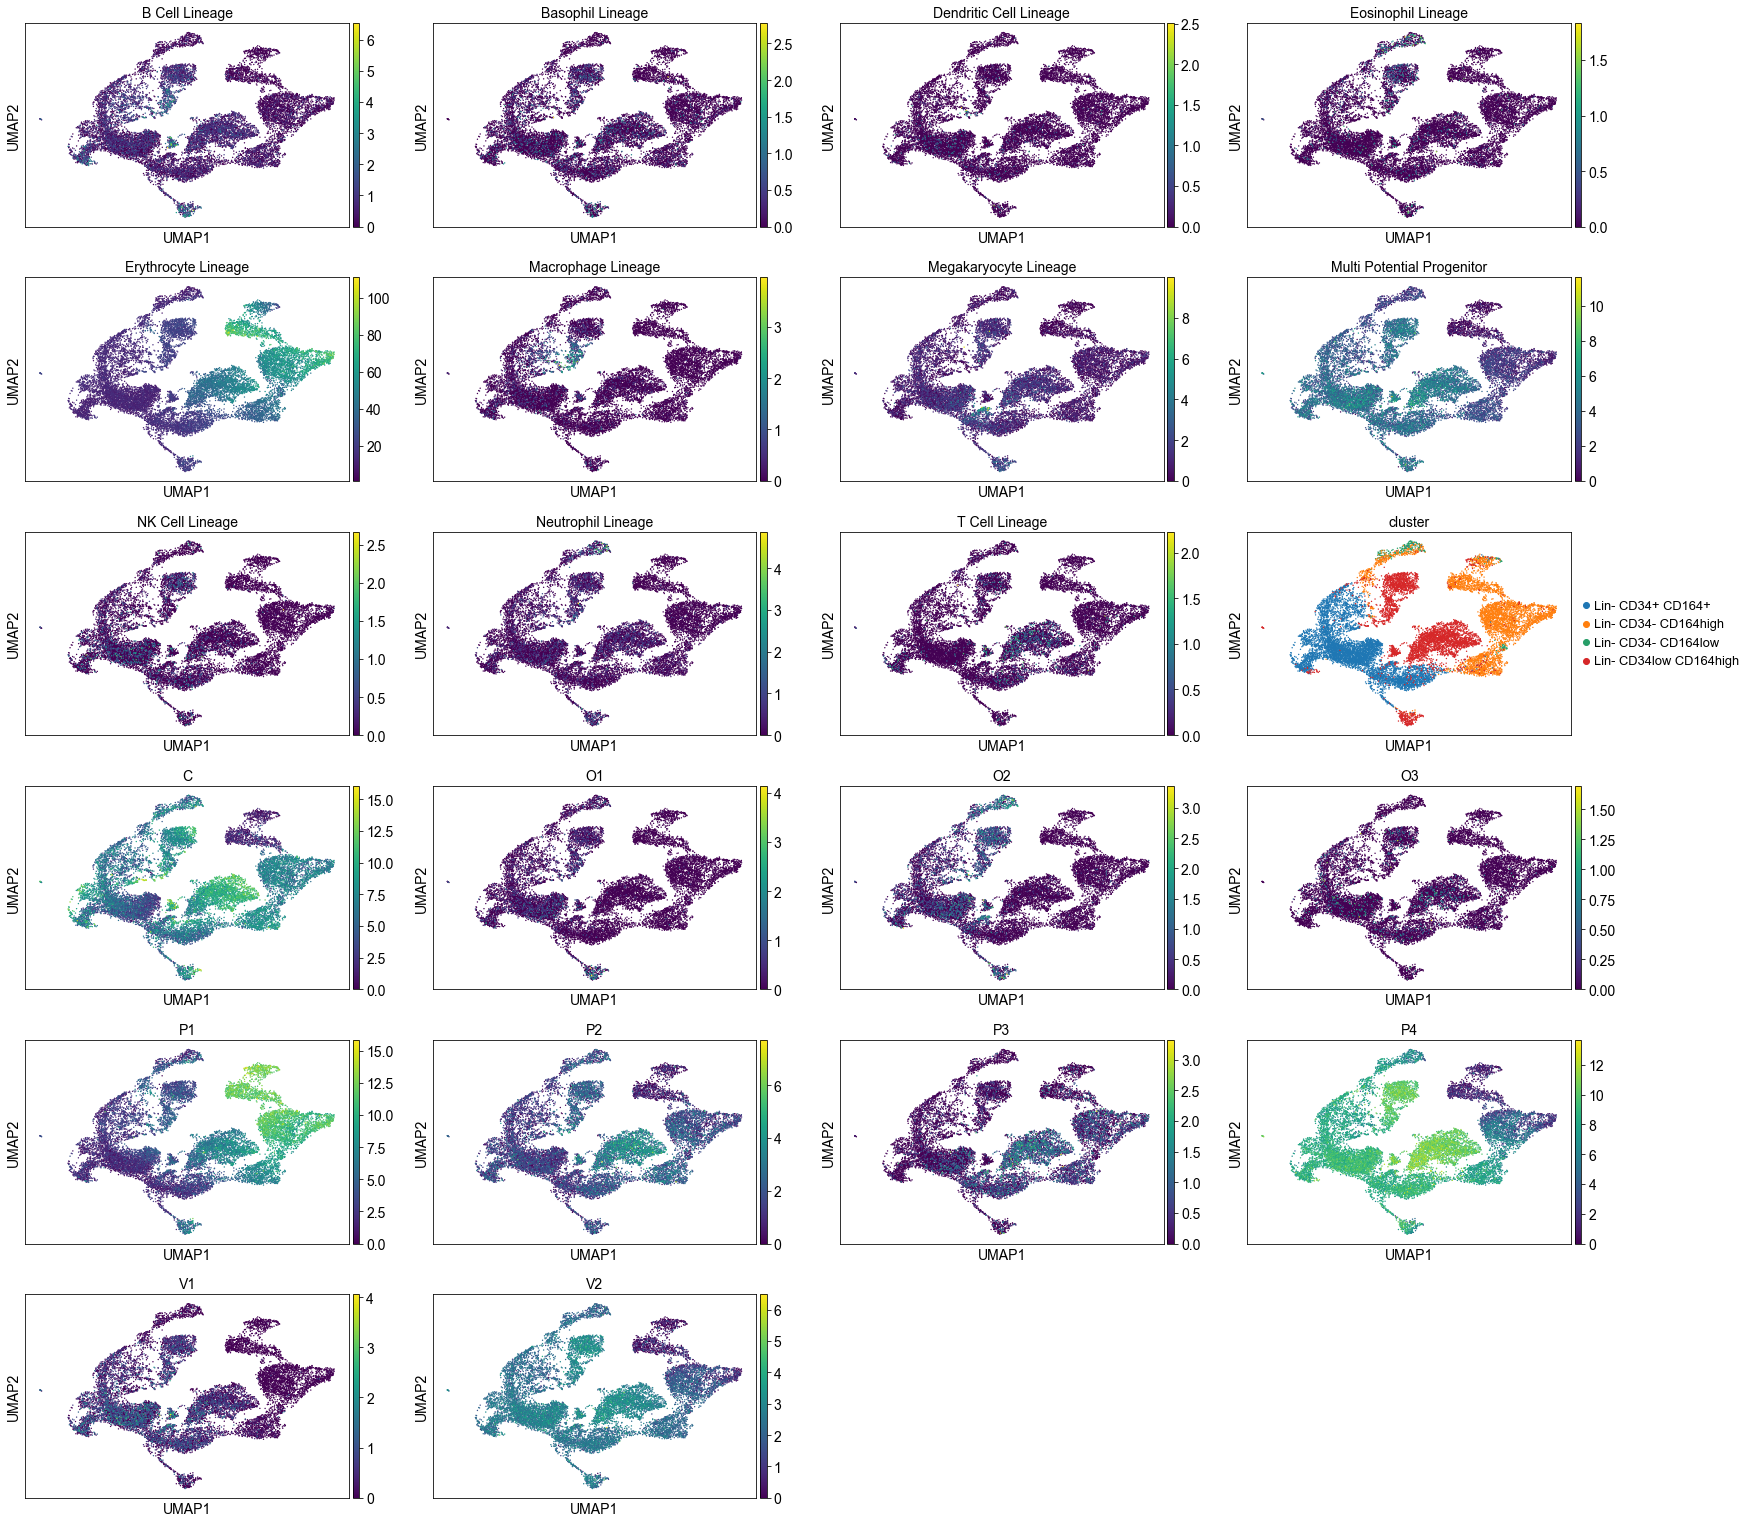

In [25]:
sc.pl.umap(concat_two, color=['B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage',
       'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage',
       'Megakaryocyte Lineage', 'Multi Potential Progenitor',
       'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage','cluster', 'C', 'O1', 'O2', 'O3', 'P1', 'P2', 'P3', 'P4',
       'V1', 'V2'], use_raw=False)

drawing single-cell graph using layout "fa"
    finished (0:01:53.33) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


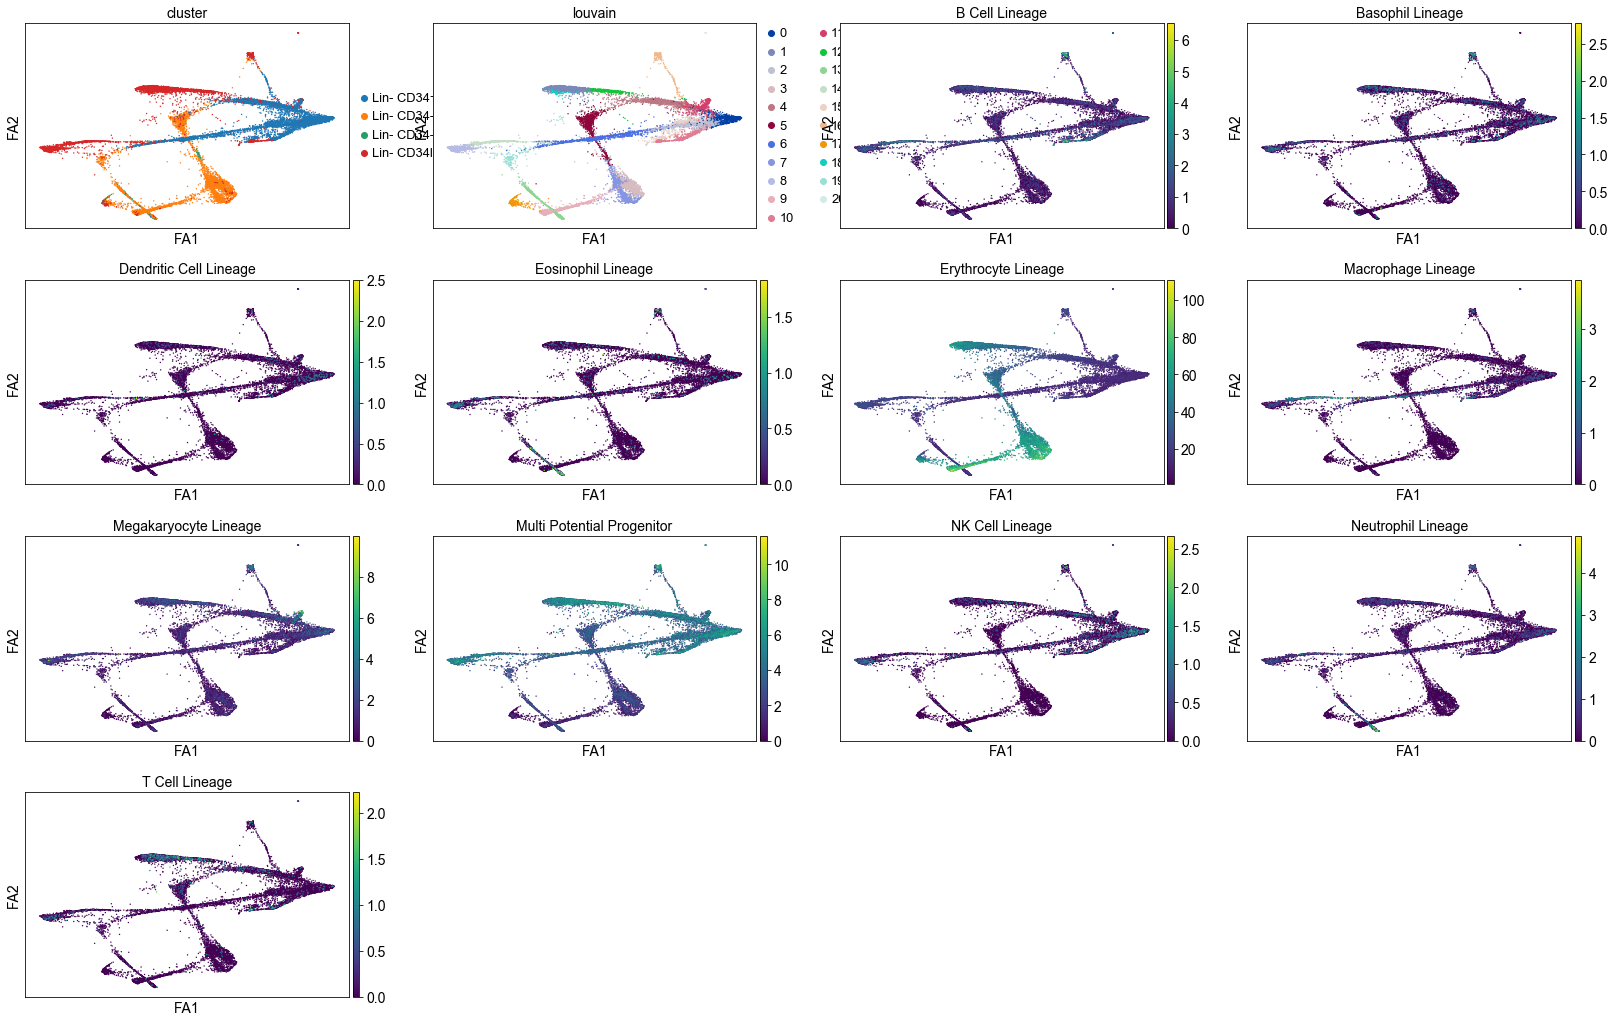

In [26]:
sc.tl.draw_graph(concat_two)
sc.pl.draw_graph(concat_two, color=['cluster', 'louvain', 'B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage',
       'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage',
       'Megakaryocyte Lineage', 'Multi Potential Progenitor',
       'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage'])


running PAGA
    finished (0:00:00.95) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])


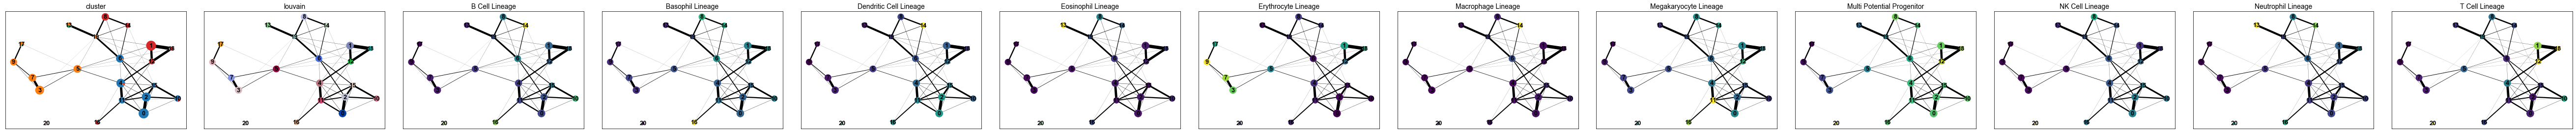

In [27]:
sc.tl.paga(concat_two)
sc.pl.paga(concat_two, color=['cluster', 'louvain', 'B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage',
       'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage',
       'Megakaryocyte Lineage', 'Multi Potential Progenitor',
       'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage'])

In [28]:
concat_one.write('/home/hsher/processed_single_cell_data/pellin_cd34.h5ad')

In [29]:
concat_two.write('/home/hsher/processed_single_cell_data/pellin_lin.h5ad')